In [21]:
# Load the necessary packages and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
Patients_df=pd.read_excel("HospitalDatabase.xlsx","Patients")

In [23]:
Discharges_df=pd.read_excel("HospitalDatabase.xlsx","Discharges")

In [24]:
EDVisits = pd.read_excel("HospitalDatabase.xlsx", "EDVisits")

In [25]:
AmbulatoryVisits_df = pd.read_excel("HospitalDatabase.xlsx", "AmbulatoryVisits")

In [26]:
Providers_df = pd.read_excel("HospitalDatabase.xlsx", "Providers")

In [27]:
EDUnique_df = pd.read_excel("HospitalDatabase.xlsx", "EDUnique")

In [28]:
ReAdmissionRegistry_df = pd.read_excel("HospitalDatabase.xlsx", 'ReAdmissionRegistry')

### Q1. Grouped Bar Chart : To find the number of patients discharged by Primary diagnosis

In [29]:
Exp_home_tra = Discharges_df.groupby(["PrimaryDiagnosis", "DischargeDisposition"], as_index=False).agg({'PatientID': pd.Series.count})
Exp_home_tra.head()

,PrimaryDiagnosis,DischargeDisposition,PatientID
0,AMI,Expired,6
1,AMI,Home,42
2,Afib,Expired,4
3,Afib,Home,6
4,Afib,Transfer,1


In [170]:
g_bar = px.bar(Exp_home_tra,
               x='PrimaryDiagnosis',
               y='PatientID',
               title='DischargeDisposition by PrimaryDiagnosis',
               color='DischargeDisposition',
               barmode='group')
 
g_bar.update_layout(xaxis_title='PrimaryDiagnosis',
                    yaxis_title='Number of Patients',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

### Q2 . Applying indicator flag in merging the dataframes.

In [174]:
"""Indicator Flag :adds a column to the output DataFrame called "_merge" with
     information on the source of each row. The column can be given a different
    name by providing a string argument. The column will have a Categorical
    type with the value of "left_only" for observations whose merge key only
     appears in the left DataFrame, "right_only" for observations
     whose merge key only appears in the right DataFrame, and "both"
     if the observation's merge key is found in both DataFrames."""

merge_df1=pd.merge(Patients_df,Discharges_df,on="PatientID",how="left",indicator=True)
merge_df1.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,_merge
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English,389.00,2018-01-01,2018-01-04 19:59:31.390889,Home,Hospitalist,Kidney Failure,6.72,0.01,both
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English,635.00,2018-01-01,2018-01-04 21:28:51.897839,Home,General Medicine,Flu,3.83,0.60,both
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English,606.00,2018-01-01,2018-01-04 22:28:23.672392,Home,General Medicine,Flu,3.38,0.27,both
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English,587.00,2018-01-01,2018-01-05 05:47:04.932834,Home,General Medicine,Flu,3.76,0.31,both


### Q3:Loop through rows of a data frame to find the last names of patient.

In [115]:
# Loop through rows of a data frame to find the last names of patient.
for (index, row) in Patients_df.iterrows():
    if row.FirstName == "Carmine":
        print(row.LastName)

Texas
Steuhlmeyer


### Q4:details for patient who has maximum pulse (AmbalatoryVisits table)

In [175]:
print(AmbulatoryVisits_df['Pulse'].max())
AmbulatoryVisits_df['VisitDepartmentID'].loc[AmbulatoryVisits_df['Pulse'].idxmax()]

99.98646314


6

In [176]:
AmbulatoryVisits_df.loc[AmbulatoryVisits_df['Pulse'].idxmax()]

VisitID                                          174
PatientMRN                                       812
ProviderID                                        22
DateofVisit                      2019-02-19 00:00:00
DateScheduled             2019-01-31 21:32:02.485196
VisitDepartmentID                                  6
VisitType                                  Follow Up
BloodPressureSystolic                          182.0
BloodPressureDiastolic                         115.9
Pulse                                          99.99
VisitStatus                                Completed
Name: 495, dtype: object

### Q5.Which reason of visit has maximum mortality rate

### Q6: Searching for patterns in Text using Regular Expressions

In [123]:
import re

# List of patterns to search for
patterns = ['term1', 'term2']

# Text to parse
text = 'This is a string with term1, but it does not have the other term.'

for pattern in patterns:
    print('Searching for "%s" in:\n "%s"\n' %(pattern,text))
    
    #Check for match
    if re.search(pattern,text):
        print('Match was found. \n')
    else:
        print('No Match was found.\n')

Searching for "term1" in:
 "This is a string with term1, but it does not have the other term."

Match was found. 

Searching for "term2" in:
 "This is a string with term1, but it does not have the other term."

No Match was found.



### Q7:Calling multiple columns from a dataframe

In [23]:
from pandas import DataFrame
DataFrame(Patients_df,columns=['FirstName','LastName'])

,FirstName,LastName
0,Lanni,Sue
1,Far,Myers
2,Devlin,Michael
3,Carmine,Texas
4,Tann,Bama
...,...,...
940,Wat,Fideler
941,Wandie,Baythrop
942,Diahann,Smeeton
943,Panchito,Sharple


### Q8:Calling Index

In [27]:
Patients_df.loc[3]

PatientID                               4
FirstName                         Carmine
LastName                            Texas
DateOfBirth    1968-10-15 03:32:13.634776
Gender                               Male
Race                                White
Language                          English
Name: 3, dtype: object

### Q9:For full list of ways to create DataFrames from various sources go to the documentation for pandas:

In [28]:
import webbrowser
website = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html'
webbrowser.open(website)

True

### Q10: cross-tablulation (basically a special case of pivot-tables)

In [33]:
# Now we can create a cross-tabulation table, which is basically just a frequency table
ED_Dis = pd.merge(EDUnique_df, Discharges_df, how="inner",on= ['PatientID'])
pd.crosstab(ED_Dis.ReasonForVisit,ED_Dis.PrimaryDiagnosis,margins=True)

PrimaryDiagnosis,AMI,Afib,Broken Leg,Diabetes,Fever,Flu,Heart Failure,Hip Fracture,Hypertension,Kidney Failure,Knee Replacement,Laceration,Migraine,Pain,Pneumonia,Spinal Cord Injury,Stroke,All
ReasonForVisit,,,,,,,,,,,,,,,,,,
Accident,1,0,0,3,0,2,4,1,2,0,0,0,0,0,10,1,2,26
Bleeding,2,1,0,5,0,3,2,1,0,1,0,0,0,1,3,0,2,21
Car Accident,0,0,0,1,0,1,5,0,1,0,0,0,0,0,3,0,2,13
Chest Pain,4,1,2,6,0,5,14,1,5,4,2,2,0,0,19,0,9,74
Fever,9,4,3,9,4,14,13,5,10,3,5,5,5,0,26,0,12,127
Gun Shot,0,0,0,2,0,2,1,0,2,1,0,1,0,0,4,0,0,13
Intoxication,1,0,0,1,2,0,2,2,0,0,1,1,0,0,3,0,4,17
Laceration,0,0,0,1,1,3,2,1,1,2,0,2,1,0,2,0,1,17
Migraine,9,0,1,7,1,12,7,3,6,3,8,6,0,1,17,0,7,88


### Q11. Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

In [27]:
ED_Dis = pd.merge(EDUnique_df, Discharges_df, how="inner",on= ['PatientID'])
#ED_Dis
ED_DS_col=ED_Dis[['Acuity','ExpectedLOS','ExpectedMortality']]

In [28]:
def max_to_min(arr):
    return arr.max() - arr.min()

# Let's group the ExpectedLOS by Acuity
new_ED_Dis = ED_DS_col.groupby('Acuity')

# Show
new_ED_Dis.describe()

ExpectedLOS                                                    \
             count      mean       std       min       25%       50%   
Acuity                                                                 
1.0          315.0  8.585416  4.017682  2.012974  4.804806  8.454551   
2.0          105.0  9.206928  3.768281  2.255705  6.179944  9.589547   
3.0           57.0  8.718132  4.143377  2.113955  4.980881  9.115077   
4.0           92.0  8.723305  4.042890  2.066409  5.791651  8.278707   
5.0          151.0  9.159557  4.208608  2.102909  5.512412  9.400155   

                             ExpectedMortality                                \
              75%        max             count      mean       std       min   
Acuity                                                                         
1.0     11.875306  16.998213             315.0  0.331946  0.238709  0.000006   
2.0     12.275702  16.306983             105.0  0.329204  0.231661  0.003276   
3.0     11.447056  16.472257              57.0  0.348660  0.234065  0.027630   
4.0     11.414540  16.851937              92.0  0.340164  0.241645  0.013965   
5.0     12.545226  16.785926             151.0  0.351704  0.246499  0.003621   

                                                
             25%       50%       75%       max  
Acuity                                          
1.0     0.136607  0.288694  0.493611  0.980886  
2.0     0.129200  0.277359  0.511591  0.920635  
3.0     0.120415  0.339072  0.528969  0.927417  
4.0     0.151843  0.312911  0.459556  0.989945  
5.0     0.151260  0.307602  0.465582  0.980479

In [29]:
# We can now apply our own aggregate function, this function takes the max value of the col and subtracts the min value of the col
new_ED_Dis.agg(max_to_min)

,ExpectedLOS,ExpectedMortality
Acuity,,
1.0,14.985239,0.980880
2.0,14.051278,0.917359
3.0,14.358302,0.899787
4.0,14.785528,0.975980
5.0,14.683017,0.976858


In [30]:
# We can also pass string methods through aggregate
new_ED_Dis.agg('mean')

,ExpectedLOS,ExpectedMortality
Acuity,,
1.0,8.585416,0.331946
2.0,9.206928,0.329204
3.0,8.718132,0.348660
4.0,8.723305,0.340164
5.0,9.159557,0.351704


In [32]:
# Let's go back to the original dframe
ED_DS_col.head()

# WE can also use pivot tables instead of groupby

# Pivot table of Acuity
ED_DS_col.pivot_table(index=['Acuity'])

,ExpectedLOS,ExpectedMortality
Acuity,,
1.0,8.585416,0.331946
2.0,9.206928,0.329204
3.0,8.718132,0.348660
4.0,8.723305,0.340164
5.0,9.159557,0.351704


<AxesSubplot:>

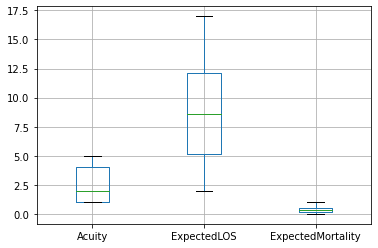

In [34]:
ED_DS_col.boxplot()

### Q12.Working on the DateofVisit column on AmbulatoryVisits_df

In [44]:
type(AmbulatoryVisits_df['DateofVisit'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [52]:
AmbulatoryVisits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   VisitID                 950 non-null    int64         
 1   PatientMRN              950 non-null    int64         
 2   ProviderID              950 non-null    int64         
 3   DateofVisit             950 non-null    datetime64[ns]
 4   DateScheduled           950 non-null    datetime64[ns]
 5   VisitDepartmentID       950 non-null    int64         
 6   VisitType               950 non-null    object        
 7   BloodPressureSystolic   826 non-null    float64       
 8   BloodPressureDiastolic  826 non-null    float64       
 9   Pulse                   826 non-null    float64       
 10  VisitStatus             950 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 81.8+ KB


In [45]:
AmbulatoryVisits_df['DateofVisit']

0     2019-03-19
1     2019-03-19
2     2019-04-02
3     2019-03-03
4     2019-03-16
         ...    
945   2019-03-27
946   2019-03-12
947   2019-05-03
948   2019-02-09
949   2019-03-04
Name: DateofVisit, Length: 950, dtype: datetime64[ns]

##### Create a Checkpoint

In [70]:
df_AmbulatoryVisits =AmbulatoryVisits_df.copy()
df_AmbulatoryVisits

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.042525,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656371,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.695747,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.616969,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.263796,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.663861,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501334,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137141,1,Physical,177.0,125.037534,53.287036,Canceled


##### Extract the Month value and create Month value coumn

In [71]:
df_AmbulatoryVisits['DateofVisit'][0]

Timestamp('2019-03-19 00:00:00')

In [64]:
df_AmbulatoryVisits['DateofVisit'][0].month

3

In [72]:
# Creating empty list
list_of_months = []
list_of_months

[]

In [73]:
df_AmbulatoryVisits.shape

(950, 11)

In [74]:
# iteratively extracting month values from the DateofVisit column(we have 950 rows in Dataset)
for i in range(df_AmbulatoryVisits.shape[0]):
    list_of_months.append(df_AmbulatoryVisits['DateofVisit'][i].month)
list_of_months

[3,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 2,
 1,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 4,
 1,
 1,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 4,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 1,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 1,
 4,
 3,
 3,
 3,
 2,
 4,
 4,
 4,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 4,
 2,
 4,
 4,
 3,
 2,
 1,
 4,
 2,
 2,
 3,
 3,
 4,
 2,
 2,
 4,
 2,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 5,
 3,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 4,
 2,
 1,
 4,
 3,
 3,
 4,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 4,
 2,
 1,
 3,
 1,
 3,
 4,
 3,
 1,
 2,
 1,
 2,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 1,
 4,


In [75]:
len(list_of_months)

950

In [76]:
# creating new column in our dataframe
df_AmbulatoryVisits['Month Value']=list_of_months

In [77]:
df_AmbulatoryVisits.head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,Month Value
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000000,10,Physical,188.0,144.143427,83.044920,No Show,3
1,436,820,25,2019-03-19,2019-02-24 07:10:31.042525,3,Follow Up,179.0,118.876808,90.309544,No Show,3
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656371,11,Telemedicine,133.0,98.749563,80.859776,No Show,4
3,799,884,37,2019-03-03,2019-02-25 01:25:39.695747,4,Telemedicine,132.0,98.001270,82.184737,No Show,3
4,515,32,26,2019-03-16,2019-02-20 06:44:59.616969,11,Telemedicine,131.0,85.115632,89.192362,No Show,3


#### Extract the Day of the week and create 

In [87]:
df_AmbulatoryVisits['DateofVisit'][949]

Timestamp('2019-03-04 00:00:00')

In [88]:
# 4th march of 2019 is sunday
df_AmbulatoryVisits['DateofVisit'][949].weekday()

0

In [92]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [94]:
df_AmbulatoryVisits['Day of the week']=df_AmbulatoryVisits['DateofVisit'].apply(date_to_weekday)

In [95]:
df_AmbulatoryVisits

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,Month Value,Day of the week
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000000,10,Physical,188.0,144.143427,83.044920,No Show,3,1
1,436,820,25,2019-03-19,2019-02-24 07:10:31.042525,3,Follow Up,179.0,118.876808,90.309544,No Show,3,1
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656371,11,Telemedicine,133.0,98.749563,80.859776,No Show,4,1
3,799,884,37,2019-03-03,2019-02-25 01:25:39.695747,4,Telemedicine,132.0,98.001270,82.184737,No Show,3,6
4,515,32,26,2019-03-16,2019-02-20 06:44:59.616969,11,Telemedicine,131.0,85.115632,89.192362,No Show,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.263796,5,Telemedicine,187.0,126.695141,70.049167,Canceled,3,2
946,703,855,36,2019-03-12,2019-02-19 02:27:52.663861,10,Follow Up,182.0,140.703502,73.380812,Canceled,3,1
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501334,12,New,150.0,84.841197,61.625454,Canceled,5,4
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137141,1,Physical,177.0,125.037534,53.287036,Canceled,2,5


### Q13.Reverse the string without using inbuilt functions

In [ ]:
#user-defined function
def findReverse(string):
   # find reverse of string
   reverse = string[::-1]
   return reverse

# take inputs
string = input('Enter the string: ')

# calling function and display result
reverse = findReverse(string)
print('The reverse string is', reverse)

In [ ]:
# x[::-1]  is used to reverse the string of the column in pandas along with the apply function as shown below

Patients_df['First_Name'] = Patients_df.loc[:,'FirstName'].apply(lambda x: x[::-1])
Patients_df.head()

### Q14. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [127]:
PrimaryDiagnosis=ReAdmissionRegistry_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].apply(lambda x: (x.max() - x.min()))
PrimaryDiagnosis.nlargest(1)

PrimaryDiagnosis
Pneumonia    14.83426
Name: ExpectedLOS, dtype: float64

### Q15. Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) 

In [131]:
ReAdmissionRegistry_df
def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "patient_profile", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(ReAdmissionRegistry_df, head_rows=3, tail_rows=2)

'Data Head & Tail :'

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.390889,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.897839,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672392,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
718,605,741,2018-02-22,2018-03-10 06:06:12.068108,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN
719,710,742,2018-02-22,2018-03-10 20:38:30.568130,Transfer,General Medicine,Diabetes,7.195441,0.286439,NaN,NaN,NaN


### Q16. Bubble Chart 

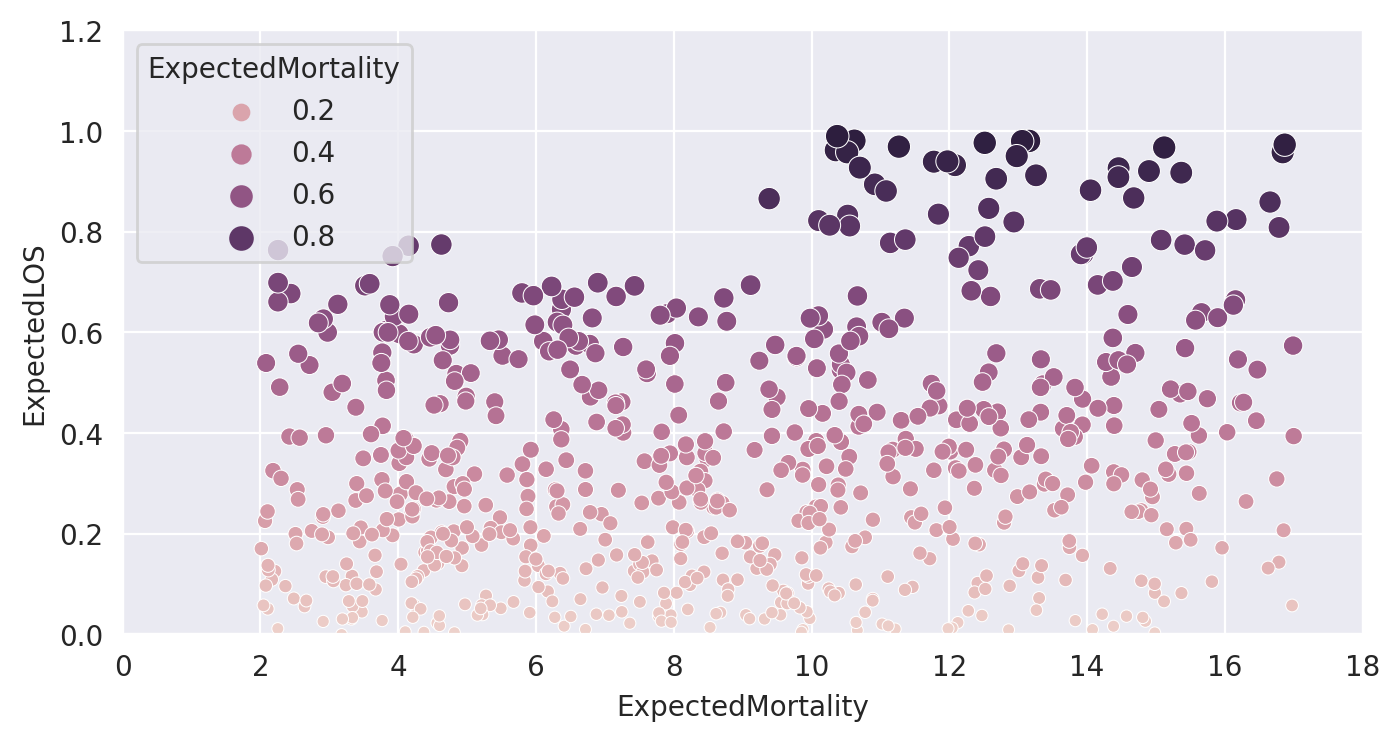

In [150]:
data_df=ReAdmissionRegistry_df
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_df,
                       x='ExpectedLOS', 
                       y='ExpectedMortality',
                       hue='ExpectedMortality',
                       size='ExpectedMortality')
 
  ax.set(ylim=(0, 1.2),
        xlim=(0, 18),
        ylabel='ExpectedLOS',
        xlabel='ExpectedMortality')


### Q17.Plotting Linear Regressions with Seaborn

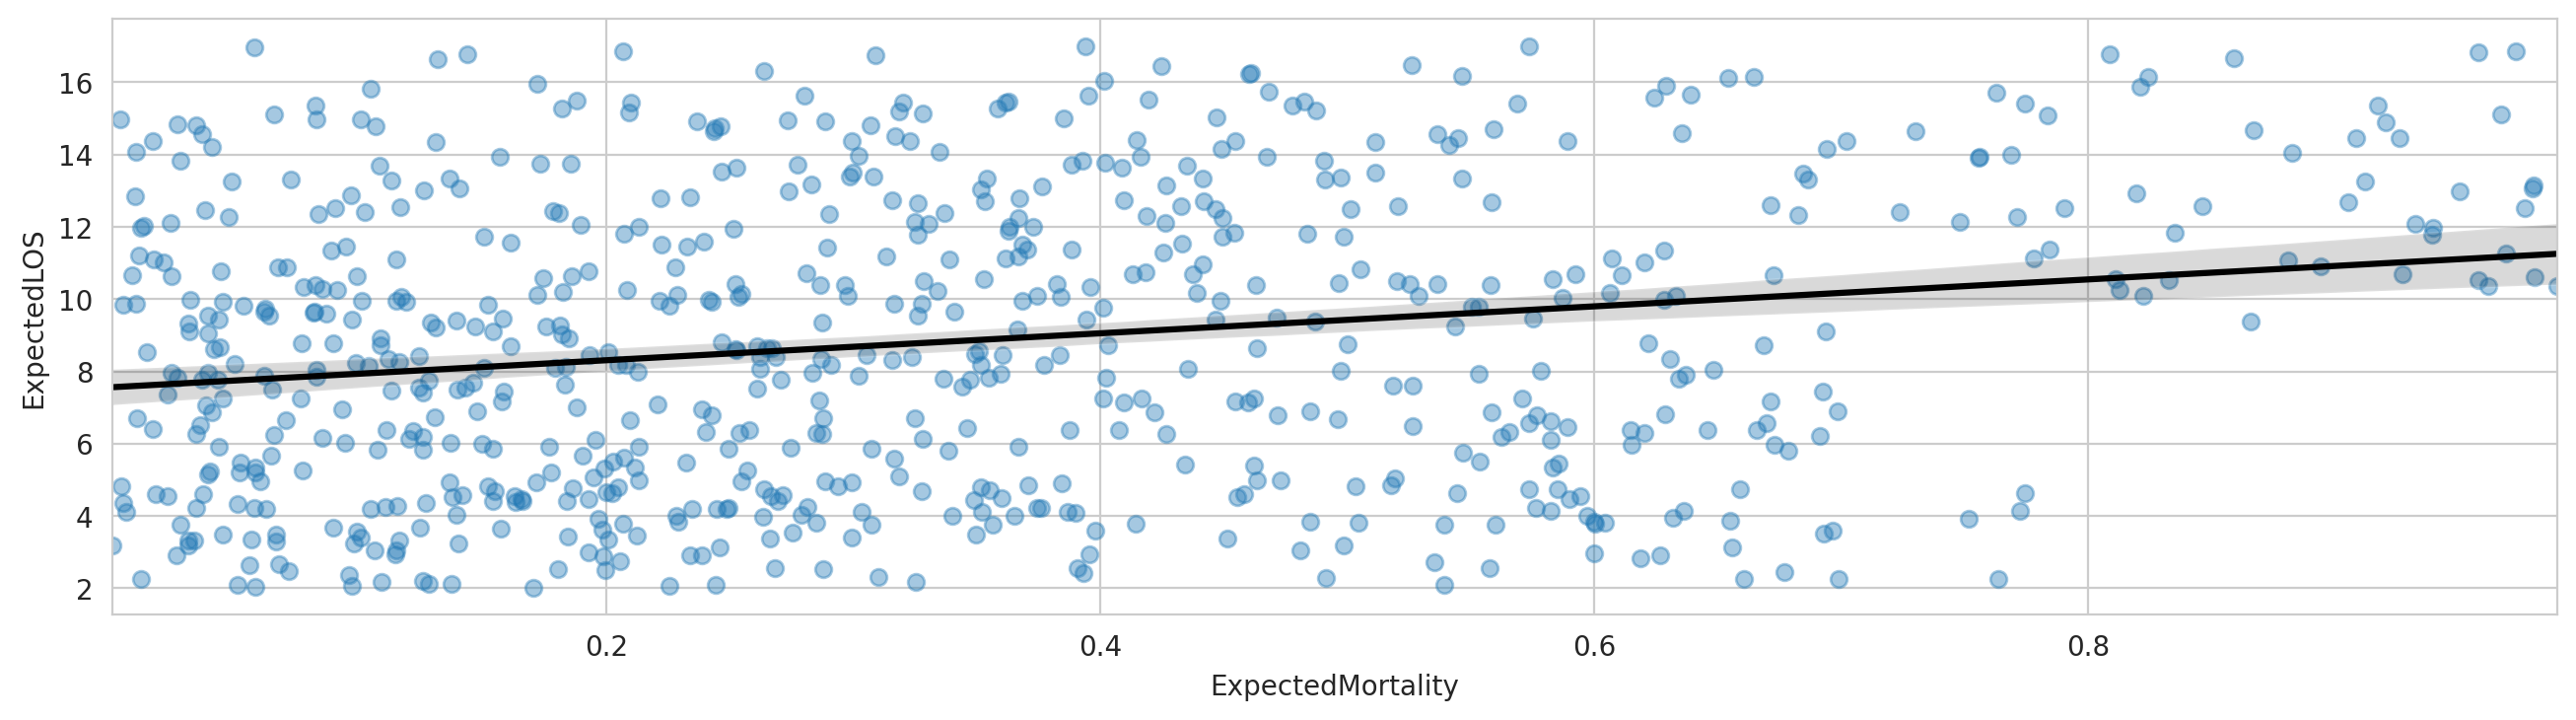

In [149]:
plt.figure(figsize=(16,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=ReAdmissionRegistry_df, 
            x='ExpectedMortality', 
            y='ExpectedLOS',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

### Q18.Number formats in the Output

In [152]:
ReAdmissionRegistry_df.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.000000,720.000000,720.000000,720.000000,194.0,194.000000,341.0
mean,360.500000,366.158333,8.824589,0.338063,1.0,5.360825,1.0
std,207.990384,218.223501,4.034421,0.238868,0.0,3.866116,0.0
min,1.000000,1.000000,2.012974,0.000006,1.0,1.000000,1.0
25%,180.750000,175.750000,5.138501,0.139771,1.0,3.000000,1.0
50%,360.500000,353.500000,8.633825,0.297242,1.0,5.000000,1.0
75%,540.250000,557.250000,12.107623,0.496387,1.0,5.000000,1.0
max,720.000000,742.000000,16.998213,0.989945,1.0,19.000000,1.0


In [153]:
pd.options.display.float_format = '{:,.2f}'.format 

In [154]:
ReAdmissionRegistry_df.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.00,720.00,720.00,720.00,194.00,194.00,341.00
mean,360.50,366.16,8.82,0.34,1.00,5.36,1.00
std,207.99,218.22,4.03,0.24,0.00,3.87,0.00
min,1.00,1.00,2.01,0.00,1.00,1.00,1.00
25%,180.75,175.75,5.14,0.14,1.00,3.00,1.00
50%,360.50,353.50,8.63,0.30,1.00,5.00,1.00
75%,540.25,557.25,12.11,0.50,1.00,5.00,1.00
max,720.00,742.00,17.00,0.99,1.00,19.00,1.00
